## 13.4 Pandas 可视化

Pandas 为 Series 和 DataFrame 对象提供了 Matplotlib 库 plot() 函数的简单包装实现，
本节进行简单的介绍。

我们先导入示例数据集 mtcars，它是美国 Motor Trend 收集
的 1973 到 1974 年期间总共 32 辆汽车的 11 个指标，
包含油耗、设计、性能等方面。

In [1]:
import pandas as pd
import numpy as np

In [2]:
mtcars = pd.read_csv('files/chapter11/mtcars.csv')
mtcars.describe()
mtcars.shape

(32, 11)

mtcars 所有列中 mpg 是每加仑油耗行驶的英里数，cyl 是发动机汽缸数。下面我们就使用这两列进行可视化分析。

In [3]:
df = mtcars.loc[:, ['cyl', 'mpg']]
df.head()

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8
3,6,21.4
4,8,18.7


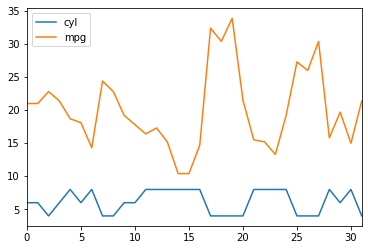

In [4]:
%matplotlib inline  
df.plot() 

默认情况下，plot() 方法使用线图形式进行绘制。如果想要绘制其他的图形类型，我们可以使用关键字参数 kind 进行指定。

- bar - 条形图
- barh - 横条形图
- hist - 直方图
- box - 箱线图
- area - 面积图
- scatter 散点图

### 13.4.1 条形图

条形图利用条形的高度来表示数值，此处我们有 32 辆汽车的数据，所以会有 32 组条形。

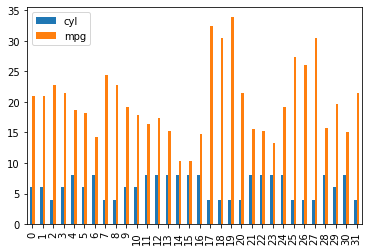

In [6]:
df.plot(kind='bar')

使用 barh 来调换 x 和 y 轴。

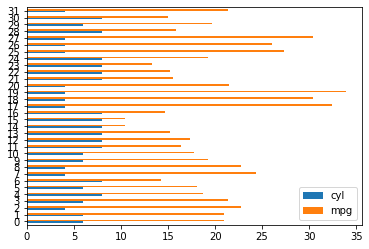

In [7]:
df.plot(kind='barh')

我们可能想将图形堆叠起来，可以指定 stacked 为 True。

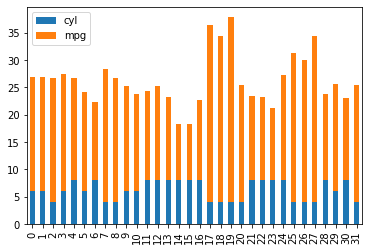

In [8]:
df.plot(kind='bar', stacked=True)

图中 x 轴显示的是数值，没有特别的含义，我们给数据加上标签，让它显示出来。

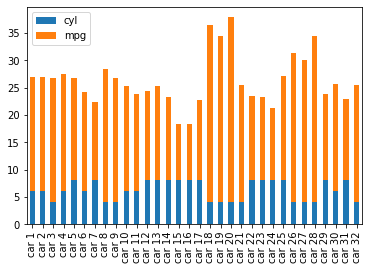

In [20]:
df2 = df.copy()
df2.index = ['car '+str(i) for i in np.arange(32) + 1]
df2.plot(kind='bar', stacked=True)

### 13.4.2 直方图

直方图可以比较直观展示数据分布，是初步了解数据的最好方式之一。

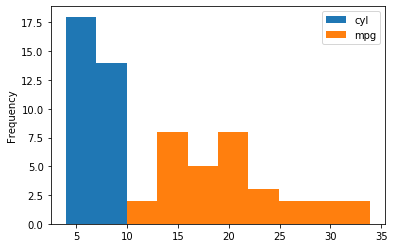

In [21]:
df.plot(kind='hist')

通过指定 bins 选项，我们可以修改 bin 的宽度。

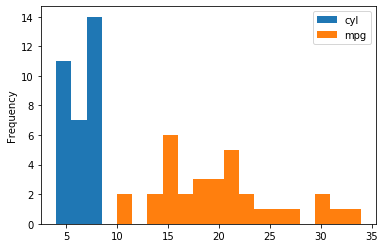

In [22]:
df.plot(kind='hist', bins=20)

上面将两个变量的分布绘制在了一个图中，我们还可以直接调用 hist() 方法为每一个变量单独绘制直方图。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09f0db1190>,
      dtype=object)

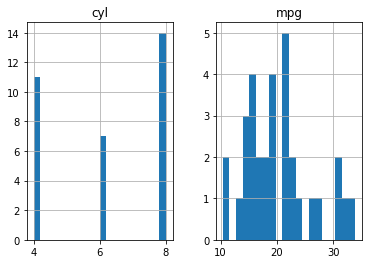

In [23]:
df.hist(bins=20)

### 13.4.3 箱线图

上面的直方图显示了气缸数是 3 个离散值 4、6、8。我们可能更加想要比较不同组别之间油耗的差异，这种情况下箱线图是很好的展示方式。

不过 plot() 方法绘制箱线图时默认是为每列单独绘制，无法进行分组。

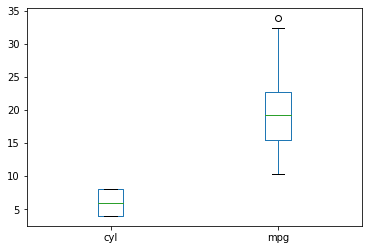

In [43]:
df.plot(kind='box')

为了将油耗按照气缸数分组后绘制箱线图，可以直接使用 boxplot() 方法，它支持更多的绘图参数。例如，通过 by 参数指定进行分组的列名。

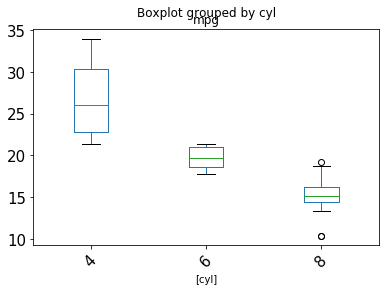

In [46]:
# 为了优化显示效果，我们进行了 3 项自定义：
# 去掉网格线
# 旋转 x 轴标签
# 增大字体
df.boxplot(by='cyl', grid=False, rot=45, fontsize=15)

### 13.4.4 面积图

面积图的效果有点类似堆叠条形图，前者更适用于连续变量，后者更适用于离散变量。

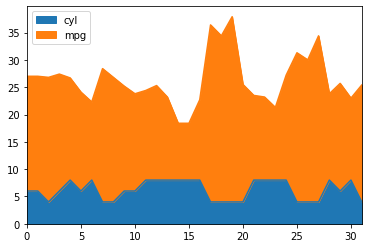

In [47]:
df.plot(kind='area')

### 13.4.5 散点图

散点图可以更加直观地观测单个数据点的情况。这里变量 cyl 是离散值，所以下面绘制的图形可能看起来有点奇怪。不过，有时候这种表现形式可能带来意想不到的效果。

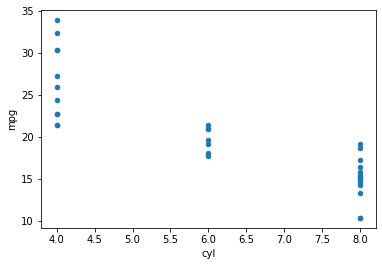

In [48]:
df.plot(kind='scatter', x='cyl', y='mpg')

### 13.4.6 饼图

饼图可以显示数据的占比情况，一般是使用一列的数据，即一个 Series 对象。下面代码提取了 cyl 变量并进行了可视化。

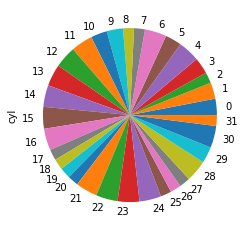

In [54]:
df.cyl.plot(kind='pie')

当需要可视化多列，即一个 DataFrame 对象时，我们需要指定 subplots 为 True。

下面代码提取了 df 前 5 行的数据用于可视化。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09eb60dc10>,
      dtype=object)

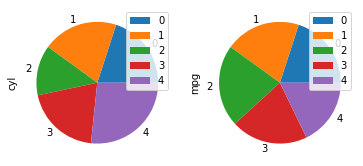

In [74]:
df.head(5).plot(kind='pie', subplots=True)

https://www.yiibai.com/pandas/python_pandas_visualization.html